# Laboratorio 1


## Ejercicio 1: Trabajando con Tensores

1. Crear tres tensores que contengan valores aleatorios entre 0 y 20 con forma [5, 300, 3], mostrar estos tensores y mostrar los elementos que se repiten en los tres.
2. Crear dos tensores con valores aleatorios entre 0 y 1 con forma [224, 224, 3], y encontrar su producto punto.
3. Encontrar los valores mínimo y máximo de los tensores que creó en el anterior punto.
4. Crear un tensor con valores aleatorios entre el 0 y 1 usando una la distribución uniforme y con la forma [1, 224, 224, 3]. Luego exprimirlo para cambiar a la forma a [224, 224, 3].
5. Crear 5 imágenes en escala de grises de 5x5 con Numpy y transformarlas en un tensor con las dimensiones [5,1,1,5,5].
6. Programar una función para visualizar cualquiera de las imágenes generadas en el paso anterior. Se sugiere usar el módulo pyplot para visualizar cualquier array de numpy con 2 o 3 dimensiones, y que cuente con el formato np.uint8

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Crear tres tensores aleatorios entre 0 y 20 con forma [5, 300, 3]
t1 = tf.random.uniform(shape=[5, 300, 3], minval=0, maxval=20, dtype=tf.int32)
t2 = tf.random.uniform(shape=[5, 300, 3], minval=0, maxval=20, dtype=tf.int32)
t3 = tf.random.uniform(shape=[5, 300, 3], minval=0, maxval=20, dtype=tf.int32)

print("Tensor 1:\n", t1.numpy())
print("Tensor 2:\n", t2.numpy())
print("Tensor 3:\n", t3.numpy())

# Mostrar elementos que se repiten en los tres
# Convertimos a 1D para la intersección
common = np.intersect1d(
    np.intersect1d(t1.numpy().flatten(), t2.numpy().flatten()),
    t3.numpy().flatten()
)
print("\nElementos comunes a los tres tensores:", common)

Tensor 1:
 [[[18 19 13]
  [ 9  5  7]
  [ 0 18  9]
  ...
  [15 14  2]
  [ 4 11  9]
  [ 9 11 11]]

 [[10  6  8]
  [12 13  3]
  [ 8 11  5]
  ...
  [17  3  0]
  [ 4 18 18]
  [18 15  0]]

 [[16 17 11]
  [12 12  5]
  [16  2 13]
  ...
  [19  0  3]
  [ 9 11 18]
  [11 17 11]]

 [[ 9  3  4]
  [ 2 16 17]
  [11  2 13]
  ...
  [16  2 10]
  [ 1 19 12]
  [12  8 19]]

 [[16  3  5]
  [13 17 12]
  [14  3  5]
  ...
  [15 19  4]
  [ 0  8  5]
  [10 14  2]]]
Tensor 2:
 [[[ 9 14 15]
  [ 2  9 18]
  [ 2  3 11]
  ...
  [10 18 19]
  [10  4 11]
  [15 10  3]]

 [[14  6 11]
  [ 6  9  2]
  [14 16 19]
  ...
  [ 3  5  5]
  [11 19 11]
  [10 15  1]]

 [[13  2  8]
  [11  2 19]
  [ 9  6  5]
  ...
  [ 1  7  1]
  [ 7 14 13]
  [ 3 18  8]]

 [[ 9  8  8]
  [ 5  3 18]
  [15  0 19]
  ...
  [ 6 14 15]
  [ 1  7 19]
  [18  7  3]]

 [[11 14 12]
  [ 1  6 18]
  [ 0 13 15]
  ...
  [ 8 19 18]
  [ 1  4 19]
  [ 0 16  4]]]
Tensor 3:
 [[[ 3 10 16]
  [ 8  9 10]
  [15  2 12]
  ...
  [ 9  3 18]
  [ 3  2 17]
  [14 16 19]]

 [[11  6 16]
  [ 8  9

In [3]:
# 2. Crear dos tensores aleatorios entre 0 y 1 con forma [224, 224, 3]
a = tf.random.uniform(shape=[224, 224, 3], minval=0, maxval=1, dtype=tf.float32)
b = tf.random.uniform(shape=[224, 224, 3], minval=0, maxval=1, dtype=tf.float32)

# Producto punto (flatten primero para coincidir dimensiones)
dot_product = tf.tensordot(tf.reshape(a, [-1]), tf.reshape(b, [-1]), axes=1)
print("\nProducto punto de a y b:", dot_product.numpy())


Producto punto de a y b: 37382.91


In [4]:
# 3. Encontrar min y max de a y b
print("Mínimo a:", tf.reduce_min(a).numpy(), "| Máximo a:", tf.reduce_max(a).numpy())
print("Mínimo b:", tf.reduce_min(b).numpy(), "| Máximo b:", tf.reduce_max(b).numpy())

Mínimo a: 2.1457672e-06 | Máximo a: 0.9999956
Mínimo b: 0.0 | Máximo b: 0.99999976


In [5]:
# 4. Crear tensor aleatorio entre 0 y 1 con forma [1, 224, 224, 3] y cambiar forma
tensor_3d = tf.random.uniform(shape=[1, 224, 224, 3], minval=0, maxval=1)
tensor_3d = tf.squeeze(tensor_3d)  # elimina la dimensión 1
print("\nNueva forma:", tensor_3d.shape)


Nueva forma: (224, 224, 3)


In [6]:
# 5. Crear 5 imágenes en escala de grises de 5x5 y transformarlas en tensor [5, 1, 1, 5, 5]
images = [np.random.randint(0, 256, size=(5, 5), dtype=np.uint8) for _ in range(5)]
tensor_images = tf.convert_to_tensor(images, dtype=tf.uint8)
tensor_images = tf.reshape(tensor_images, [5, 1, 1, 5, 5])
print("\nTensor imágenes forma:", tensor_images.shape)


Tensor imágenes forma: (5, 1, 1, 5, 5)


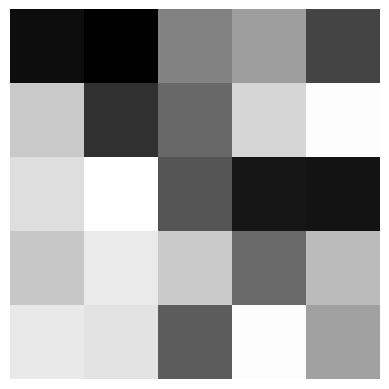

In [7]:
# 6. Función para visualizar imágenes (2D o 3D) con np.uint8
def show_image(img_array):
    if not isinstance(img_array, np.ndarray):
        img_array = img_array.numpy()
    if img_array.ndim == 2:  # escala de grises
        plt.imshow(img_array, cmap="gray")
    else:
        plt.imshow(img_array)
    plt.axis("off")
    plt.show()

# Probar la función con la primera imagen
show_image(images[0])

## Ejercicio 2: Registro de asistencia¶
Este ejercicio requiere modelar el registro y contabilización de asistencias en una escuela usando tensores de TensorFlow. Puede inventar una lista de 15 estudiantes que participaron 60 días de clase durante un trimestre. Aunque no todos los estudiantes asistieron los 60 días, usted tiene el registro de cuando asistieron y cuando no. Su tarea será cuantificar los siguientes aspectos:

1. ¿Cuál fue el estudiante que tuvo más faltas?
2. ¿Cuántas asistencias tiene cada estudiante?
3. ¿Cuál es el promedio de asistencia en el curso?
4. ¿Qué estudiante tuvo menos faltas?

In [8]:
# -------------------------------
# Configuración y datos sintéticos
# -------------------------------
tf.random.set_seed(42)  # reproducibilidad

num_students = 15
num_days = 60
p_present = 0.9   # probabilidad de asistencia (ajústala si quieres)
students = [f"Est_{i+1:02d}" for i in range(num_students)]

# Tensor binario [estudiante, día] con 1=asistió, 0=faltó
attendance = tf.cast(tf.random.uniform([num_students, num_days]) < p_present, tf.int32)

In [9]:
# --------------------------------
# Cálculos solicitados por el enunciado
# --------------------------------
# 1) ¿Cuál fue el estudiante que tuvo más faltas?
att_by_student = tf.reduce_sum(attendance, axis=1)          # asistencias por estudiante [15]
abs_by_student = num_days - att_by_student                   # faltas por estudiante [15]
max_abs = tf.reduce_max(abs_by_student)
idx_max_abs = tf.where(abs_by_student == max_abs)[:, 0]      # todos los empatados

# 2) ¿Cuántas asistencias tiene cada estudiante?
#    (ya está en att_by_student)

# 3) ¿Cuál es el promedio de asistencia en el curso?
course_attendance_rate = tf.reduce_mean(tf.cast(attendance, tf.float32))  # proporción global

# 4) ¿Qué estudiante tuvo menos faltas?
min_abs = tf.reduce_min(abs_by_student)
idx_min_abs = tf.where(abs_by_student == min_abs)[:, 0]      # todos los empatados

In [10]:
# --------------------------------
# Salidas legibles
# --------------------------------
def names_from_indices(indices):
    return [students[int(i)] for i in indices.numpy().tolist()]

print("=== Resumen de asistencia ===")
print(f"Forma del tensor de asistencia: {attendance.shape} (estudiantes x días)")
print()

print("Asistencias por estudiante (orden Est_01..Est_15):")
print(att_by_student.numpy().tolist())
print()

print(f"Promedio de asistencia del curso: {course_attendance_rate.numpy()*100:.2f}%")
print()

print(f"Máximo de faltas: {int(max_abs.numpy())}")
print("Estudiante(s) con más faltas:", names_from_indices(idx_max_abs))
print()

print(f"Mínimo de faltas: {int(min_abs.numpy())}")
print("Estudiante(s) con menos faltas:", names_from_indices(idx_min_abs))

=== Resumen de asistencia ===
Forma del tensor de asistencia: (15, 60) (estudiantes x días)

Asistencias por estudiante (orden Est_01..Est_15):
[57, 52, 55, 57, 56, 54, 56, 56, 56, 54, 55, 53, 56, 57, 50]

Promedio de asistencia del curso: 91.56%

Máximo de faltas: 10
Estudiante(s) con más faltas: ['Est_15']

Mínimo de faltas: 3
Estudiante(s) con menos faltas: ['Est_01', 'Est_04', 'Est_14']


## **Ejercicio 3:** Métricas de Evaluación

Este ultimo modelo obtuvo 95.3% de *accuracy*. Ahora, tendrás que investigar y visualizar las métricas de evaluación LogarithmicLoss, Matriz de Confusión, AUC, Recall, y F1 Score para un lote del subconjunto de evaluación. Las funciones para obtener estas se encuentran disponibles en la librería `sklearn.metrics`.

#### Tomaremos en cuenta todo lo que existe en el notebook de base

In [11]:
# 5.1/5.2 Carga de datos con tfds
(training_set, ds_info_train), (testing_set, ds_info_test) = (
    tfds.load('fashion_mnist', split='train', as_supervised=True, with_info=True),
    tfds.load('fashion_mnist', split='test',  as_supervised=True, with_info=True),
)

# Normalización 0–1
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # (28,28)
    image = tf.expand_dims(image, -1)           # -> (28,28,1) para Keras
    return image, label

# Pipeline (cache → shuffle → batch → prefetch)
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE

train_ds = (training_set
            .map(normalize, num_parallel_calls=AUTOTUNE)
            .cache()
            .shuffle(10_000)
            .batch(BATCH_SIZE)
            .prefetch(AUTOTUNE))

test_ds = (testing_set
           .map(normalize, num_parallel_calls=AUTOTUNE)
           .cache()
           .batch(BATCH_SIZE)
           .prefetch(AUTOTUNE))

# Vista rápida de un batch (para verificar shapes)
for xb, yb in train_ds.take(1):
    print("Train batch:", xb.shape, yb.shape)  # (64,28,28,1) (64,)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.CAUZZ2_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.CAUZZ2_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
Train batch: (64, 28, 28, 1, 1) (64,)


2025-08-11 00:41:55.208082: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-08-11 00:41:55.208879: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [12]:
from tensorflow import keras
from tensorflow.keras import layers

# 5.3/5.4 Definición del modelo
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 5.5/5.6 Compilación y entrenamiento
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 5
history = model.fit(train_ds, epochs=EPOCHS, validation_data=test_ds)

# Evaluación rápida global (opcional)
loss, acc = model.evaluate(test_ds)
print(f"\nLoss test: {loss:.4f} | Accuracy test: {acc:.4f}")

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.5206 - accuracy: 0.8184 - val_loss: 0.4461 - val_accuracy: 0.8408
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.3879 - accuracy: 0.8618 - val_loss: 0.4047 - val_accuracy: 0.8581
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.3497 - accuracy: 0.8733 - val_loss: 0.3752 - val_accuracy: 0.8645
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.3242 - accuracy: 0.8819 - val_loss: 0.3979 - val_accuracy: 0.8585
Epoch 5/5
157/157 [==============================] - 0s 444us/step - loss: 0.3532 - accuracy: 0.8719

Loss test: 0.3532 | Accuracy test: 0.8719


=== Métricas (lote de evaluación) ===
Accuracy: 0.9688
LogLoss:  0.1249
Recall:   0.9775
F1:       0.9711
AUC:      0.9996


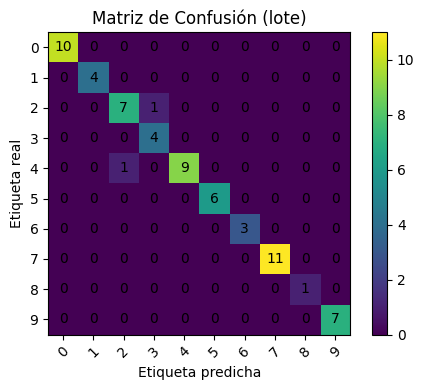

In [13]:
# Ejercicio 3 
from sklearn.metrics import (
    log_loss, confusion_matrix, roc_auc_score,
    recall_score, f1_score, accuracy_score
)

# Tomamos UN lote del conjunto de evaluación (como pide el enunciado)
X_batch, y_batch = next(iter(test_ds))
y_true = y_batch.numpy()                    # (N,)
y_prob = model.predict(X_batch, verbose=0)  # (N,10) softmax
y_pred = np.argmax(y_prob, axis=1)          # (N,)

# Métricas
accuracy = accuracy_score(y_true, y_pred)
logloss  = log_loss(y_true, y_prob)                               # usa probabilidades
recall   = recall_score(y_true, y_pred, average="macro")          # macro para multiclase
f1       = f1_score(y_true, y_pred, average="macro")
auc      = roc_auc_score(y_true, y_prob, multi_class="ovr", average="macro")

cm = confusion_matrix(y_true, y_pred)

print("=== Métricas (lote de evaluación) ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"LogLoss:  {logloss:.4f}")
print(f"Recall:   {recall:.4f}")
print(f"F1:       {f1:.4f}")
print(f"AUC:      {auc:.4f}")

# Matriz de confusión (matplotlib puro)
def plot_confusion_matrix(cm, class_names=None, normalize=False, title="Matriz de Confusión"):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
    plt.figure(figsize=(5,4))
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    ticks = np.arange(cm.shape[0])
    if class_names is None:
        class_names = [str(i) for i in range(cm.shape[0])]
    plt.xticks(ticks, class_names, rotation=45)
    plt.yticks(ticks, class_names)
    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center")
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm, normalize=False, title="Matriz de Confusión (lote)")

## **Ejercicio 4**: Clasificación de Imágenes

Para este ejercicio deberas seleccionar un dataset de clasificación de imagenes desde el catálogo de datasets de TF. Luego, deberas crear una red neuronal para clasificar entre las diferentes categorias del dataset. Finalmente, deberas evaluar el modelo con un lote del subconjunto de evaluación.

In [14]:
# --------- 1) Configuración ---------
# Cambiar este nombre por cualquier dataset de imágenes del catálogo TFDS
DATASET_NAME = "cifar10"  # Ejemplos: "tf_flowers", "cifar100", "rock_paper_scissors"
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE
EPOCHS = 5  # Se sube para más precisión

In [15]:
# --------- 2) Cargar dataset ---------
(train_ds_raw, info_train), (test_ds_raw, info_test) = (
    tfds.load(DATASET_NAME, split="train", as_supervised=True, with_info=True),
    tfds.load(DATASET_NAME, split="test", as_supervised=True, with_info=True),
)

class_names = info_train.features["label"].names
num_classes = len(class_names)
img_shape = info_train.features["image"].shape  # (H, W, C) o (None, None, C)
print(f"Dataset: {DATASET_NAME}")
print(f"Clases: {num_classes} → {class_names}")
print(f"Tamaño de imagen original: {img_shape}")

# Si la imagen no tiene tamaño fijo (None, None, C), definimos un resize estándar
if img_shape[0] is None or img_shape[1] is None:
    TARGET_SIZE = (128, 128)  # Puedes ajustar
else:
    TARGET_SIZE = (img_shape[0], img_shape[1])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.YSAQ23_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.YSAQ23_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Dataset: cifar10
Clases: 10 → ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Tamaño de imagen original: (32, 32, 3)


In [16]:
# --------- 3) Preprocesamiento ---------
def preprocess(image, label):
    image = tf.image.resize(image, TARGET_SIZE)      # Ajustar tamaño si es necesario
    image = tf.cast(image, tf.float32) / 255.0       # Normalizar
    return image, label

train_ds = (train_ds_raw
            .map(preprocess, num_parallel_calls=AUTOTUNE)
            .cache()
            .shuffle(10_000)
            .batch(BATCH_SIZE)
            .prefetch(AUTOTUNE))

test_ds = (test_ds_raw
           .map(preprocess, num_parallel_calls=AUTOTUNE)
           .cache()
           .batch(BATCH_SIZE)
           .prefetch(AUTOTUNE))


In [17]:
# --------- 4) Modelo CNN automático según número de clases ---------
input_shape = TARGET_SIZE + (img_shape[2],)  # (H, W, C)

model = keras.Sequential([
    layers.Conv2D(32, 3, activation="relu", padding="same", input_shape=input_shape),
    layers.Conv2D(32, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation="relu", padding="same"),
    layers.Conv2D(64, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax"),
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [18]:
# --------- 5) Entrenamiento ---------
history = model.fit(train_ds, epochs=EPOCHS, validation_data=test_ds)

# --------- 6) Evaluación en UN LOTE del test ---------
X_batch, y_batch = next(iter(test_ds))
loss_batch, acc_batch = model.evaluate(X_batch, y_batch, verbose=0)
print(f"\n[Métrica en 1 lote de test] Loss: {loss_batch:.4f} | Accuracy: {acc_batch:.4f}")

Epoch 1/5
  1/782 [..............................] - ETA: 10:04 - loss: 2.2945 - accuracy: 0.1406

2025-08-11 00:48:24.409202: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23592960 exceeds 10% of free system memory.
2025-08-11 00:48:24.409659: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23592960 exceeds 10% of free system memory.
2025-08-11 00:48:24.447652: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21528576 exceeds 10% of free system memory.
2025-08-11 00:48:24.447745: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21528576 exceeds 10% of free system memory.
2025-08-11 00:48:24.464682: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28311552 exceeds 10% of free system memory.


782/782 [==============================] - 34s 43ms/step - loss: 1.5139 - accuracy: 0.4504 - val_loss: 1.1404 - val_accuracy: 0.5928
Epoch 2/5
782/782 [==============================] - 34s 43ms/step - loss: 1.0820 - accuracy: 0.6185 - val_loss: 0.9153 - val_accuracy: 0.6784
Epoch 3/5
782/782 [==============================] - 36s 46ms/step - loss: 0.8981 - accuracy: 0.6840 - val_loss: 0.8636 - val_accuracy: 0.7043
Epoch 4/5
782/782 [==============================] - 36s 46ms/step - loss: 0.7866 - accuracy: 0.7263 - val_loss: 0.7682 - val_accuracy: 0.7335
Epoch 5/5
782/782 [==============================] - 32s 41ms/step - loss: 0.7041 - accuracy: 0.7517 - val_loss: 0.7384 - val_accuracy: 0.7392

[Métrica en 1 lote de test] Loss: 0.7659 | Accuracy: 0.7812


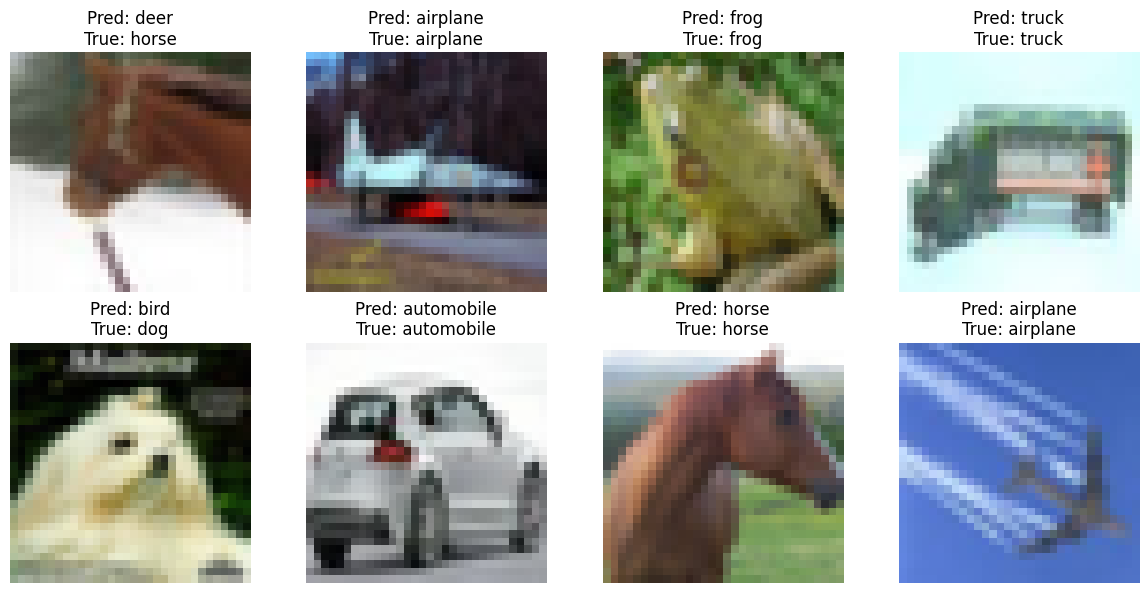

In [19]:
# --------- 7) Visualización de predicciones ---------
y_prob = model.predict(X_batch, verbose=0)
y_pred = np.argmax(y_prob, axis=1)

plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(X_batch[i].numpy())
    plt.title(f"Pred: {class_names[y_pred[i]]}\nTrue: {class_names[int(y_batch[i])]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

### **Ejercicio 5:** Despliegue del modelo

En este ejercicio, deberás desarrollar un modelo de predicción de la edad basado en redes neuronales convolucionales. El dataset que deberás usar es [UTKFace](https://susanqq.github.io/UTKFace/).

Posterior a esto, deberás crear un archivo `.py` que reciba una imagen de un rostro (revisar el siguiente [tutorial](https://www.eumus.edu.uy/eme/ensenanza/electivas/python/2020/clase_08a.html) sobre como pasar argumentos a archivos python) de manera local y lo pase al modelo de tensorflow basado en CNNs, para que este imprima la categoría reconocida en la imagen. Se recomienda guardar una imagen del dataset en formato de archivo .jpg.

Para presentar el trabajo debera adjuntar el archivo .py y un video demostrando de manera breve que su modelo CNN esta realizando inferencia.




In [26]:
# Listar y crear los split
from pathlib import Path
import random, os

tf.random.set_seed(42)
random.seed(42)

DATA_DIR = Path("data/utkface/UTKFace")  # aquí deben estar los .jpg
assert DATA_DIR.exists(), f"No encuentro {DATA_DIR}. Revisa la ruta."

# Listado de imágenes
all_files = sorted([str(p) for p in DATA_DIR.glob("*.jpg")])
print("Total imágenes:", len(all_files))
print("Ejemplos:", all_files[:3])

# Split reproducible 80/10/10
idx = np.random.permutation(len(all_files))
n = len(idx)
n_train = int(0.8*n)
n_val   = int(0.1*n)

train_files = [all_files[i] for i in idx[:n_train]]
val_files   = [all_files[i] for i in idx[n_train:n_train+n_val]]
test_files  = [all_files[i] for i in idx[n_train+n_val:]]

print("Splits:", len(train_files), len(val_files), len(test_files))

Total imágenes: 10137
Ejemplos: ['data/utkface/UTKFace/100_1_0_20170110183726390.jpg', 'data/utkface/UTKFace/100_1_2_20170105174847679.jpg', 'data/utkface/UTKFace/100_1_2_20170110182836729.jpg']
Splits: 8109 1013 1015


In [27]:
# Pipeline tf.data (decodificar imagen y extraer edad del nombre)

IMG_SIZE = 128
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE

def parse_age_from_path(path: tf.Tensor) -> tf.Tensor:
    # Nombre: 'age_gender_race_date.jpg' → tomamos el 1er campo (edad)
    fname = tf.strings.split(path, os.sep)[-1]
    age_str = tf.strings.split(fname, "_")[0]
    age = tf.strings.to_number(age_str, out_type=tf.float32)
    return age

def load_and_preprocess(path: tf.Tensor):
    img_bytes = tf.io.read_file(path)
    img = tf.io.decode_jpeg(
        img_bytes, channels=3,
        try_recover_truncated=True, acceptable_fraction=0.7
    )
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    img = tf.cast(img, tf.float32) / 255.0
    label = parse_age_from_path(path)
    return img, label

def make_ds(file_list, training=False):
    ds = tf.data.Dataset.from_tensor_slices(file_list)
    if training:
        ds = ds.shuffle(10_000, reshuffle_each_iteration=True)
    ds = ds.map(load_and_preprocess, num_parallel_calls=AUTOTUNE)
    ds = ds.apply(tf.data.experimental.ignore_errors())  # <- clave
    ds = ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    return ds

train_ds = make_ds(train_files, training=True)
val_ds   = make_ds(val_files)
test_ds  = make_ds(test_files)

# Verificación rápida
for xb, yb in train_ds.take(1):
    print("Batch:", xb.shape, yb.shape, "| Ej. edad:", float(yb[0]))

Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


Batch: (64, 128, 128, 3) (64,) | Ej. edad: 24.0


In [28]:
# Modelo CNN (regresión de edad) + entrenamiento

# (Opcional) Data augmentation simple
data_aug = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
])

model = keras.Sequential([
    data_aug,
    layers.Conv2D(32, 3, activation="relu", padding="same", input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Conv2D(32, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation="relu", padding="same"),
    layers.Conv2D(64, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="linear"),  # salida continua (edad)
])

# Para regresión: MAE (interpretable en años) o MSE
model.compile(optimizer="adam", loss="mae", metrics=["mae"])

EPOCHS = 10  # súbelo si tienes tiempo (p.ej. 15-25)
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

Epoch 1/10
     18/Unknown - 14s 723ms/step - loss: 22.4129 - mae: 22.4129

Corrupt JPEG data: premature end of data segment


     27/Unknown - 20s 713ms/step - loss: 22.1245 - mae: 22.1245

2025-08-11 02:29:18.609522: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


     51/Unknown - 38s 728ms/step - loss: 20.9763 - mae: 20.9763

Corrupt JPEG data: premature end of data segment


127/127 [==============================] - 103s 806ms/step - loss: 19.7494 - mae: 19.7494 - val_loss: 20.2339 - val_mae: 20.2339
Epoch 2/10
105/127 [=======================>......] - ETA: 20s - loss: 17.7663 - mae: 17.7663

2025-08-11 02:32:17.470032: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/127 [=========================>....] - ETA: 14s - loss: 17.7483 - mae: 17.7483

Corrupt JPEG data: premature end of data segment


123/127 [============================>.] - ETA: 3s - loss: 17.6946 - mae: 17.6946

Corrupt JPEG data: premature end of data segment


127/127 [==============================] - 119s 935ms/step - loss: 17.6794 - mae: 17.6794 - val_loss: 17.0634 - val_mae: 17.0634
Epoch 3/10
 27/127 [=====>........................] - ETA: 1:29 - loss: 16.7362 - mae: 16.7362

2025-08-11 02:33:05.310729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/127 [=========>....................] - ETA: 1:13 - loss: 17.1037 - mae: 17.1037

Corrupt JPEG data: premature end of data segment


103/127 [=======================>......] - ETA: 21s - loss: 17.2804 - mae: 17.2804

Corrupt JPEG data: premature end of data segment


127/127 [==============================] - 115s 907ms/step - loss: 17.3063 - mae: 17.3063 - val_loss: 16.9987 - val_mae: 16.9987
Epoch 4/10
 12/127 [=>............................] - ETA: 1:38 - loss: 17.2033 - mae: 17.2033

2025-08-11 02:34:46.670774: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/127 [============>.................] - ETA: 59s - loss: 17.0193 - mae: 17.0193 

Corrupt JPEG data: premature end of data segment


 86/127 [===================>..........] - ETA: 35s - loss: 16.8650 - mae: 16.8650

Corrupt JPEG data: premature end of data segment


127/127 [==============================] - 115s 905ms/step - loss: 16.6809 - mae: 16.6809 - val_loss: 16.0887 - val_mae: 16.0887
Epoch 5/10
 45/127 [=========>....................] - ETA: 1:10 - loss: 16.3227 - mae: 16.3227

Corrupt JPEG data: premature end of data segment


 98/127 [======================>.......] - ETA: 25s - loss: 16.2792 - mae: 16.2792

Corrupt JPEG data: premature end of data segment


124/127 [============================>.] - ETA: 2s - loss: 16.4094 - mae: 16.4094

2025-08-11 02:38:20.907077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/127 [==============================] - 116s 914ms/step - loss: 16.3722 - mae: 16.3722 - val_loss: 15.8772 - val_mae: 15.8772
Epoch 6/10
 61/127 [=============>................] - ETA: 1:23 - loss: 15.9743 - mae: 15.9743

Corrupt JPEG data: premature end of data segment


123/127 [============================>.] - ETA: 5s - loss: 16.1021 - mae: 16.1021

2025-08-11 02:41:02.870685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


125/127 [============================>.] - ETA: 2s - loss: 16.0975 - mae: 16.0975

Corrupt JPEG data: premature end of data segment


127/127 [==============================] - 165s 1s/step - loss: 16.1145 - mae: 16.1145 - val_loss: 16.0809 - val_mae: 16.0809
Epoch 7/10


Corrupt JPEG data: premature end of data segment


 17/127 [===>..........................] - ETA: 2:14 - loss: 16.0089 - mae: 16.0089

2025-08-11 02:41:34.271641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/127 [=========================>....] - ETA: 19s - loss: 15.8255 - mae: 15.8255

Corrupt JPEG data: premature end of data segment


127/127 [==============================] - 165s 1s/step - loss: 15.7850 - mae: 15.7850 - val_loss: 15.9544 - val_mae: 15.9544
Epoch 8/10


Corrupt JPEG data: premature end of data segment


 49/127 [==========>...................] - ETA: 1:10 - loss: 15.4643 - mae: 15.4643

Corrupt JPEG data: premature end of data segment


124/127 [============================>.] - ETA: 2s - loss: 15.5704 - mae: 15.5704

2025-08-11 02:45:48.991760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/127 [==============================] - 117s 923ms/step - loss: 15.5640 - mae: 15.5640 - val_loss: 15.3473 - val_mae: 15.3473
Epoch 9/10
 25/127 [====>.........................] - ETA: 1:53 - loss: 15.6839 - mae: 15.6839

2025-08-11 02:46:47.690220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/127 [=================>............] - ETA: 1:01 - loss: 15.4504 - mae: 15.4504

Corrupt JPEG data: premature end of data segment


120/127 [===========================>..] - ETA: 9s - loss: 15.5830 - mae: 15.5830 

Corrupt JPEG data: premature end of data segment


127/127 [==============================] - 167s 1s/step - loss: 15.5887 - mae: 15.5887 - val_loss: 15.6030 - val_mae: 15.6030
Epoch 10/10
  2/127 [..............................] - ETA: 2:17 - loss: 15.7120 - mae: 15.7120

Corrupt JPEG data: premature end of data segment


 63/127 [=============>................] - ETA: 1:03 - loss: 15.2699 - mae: 15.2699

2025-08-11 02:50:10.328152: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: premature end of data segment


127/127 [==============================] - 152s 1s/step - loss: 15.2497 - mae: 15.2497 - val_loss: 15.3557 - val_mae: 15.3557


In [30]:
# Evaluación rápida, guardar muestra y guardar el modelo
from PIL import Image
from pathlib import Path

# Métrica en 1 lote de test (rápido)
Xb, yb = next(iter(test_ds))
loss_b, mae_b = model.evaluate(Xb, yb, verbose=0)
print(f"[Test - 1 lote] MAE: {mae_b:.2f} años")

# Guardar una imagen de muestra del dataset para el script CLI
sample_path = test_files[0]
Image.open(sample_path).save("sample_utk.jpg")
print("Guardé una muestra en:", Path("sample_utk.jpg").resolve())

# Guardar el modelo (SavedModel)
OUT_DIR = Path("models/utkface_age")
OUT_DIR.parent.mkdir(parents=True, exist_ok=True)
model.save(str(OUT_DIR))
print("Modelo guardado en:", OUT_DIR.resolve())

[Test - 1 lote] MAE: 13.73 años
Guardé una muestra en: /workspace/sample_utk.jpg
INFO:tensorflow:Assets written to: models/utkface_age/assets


INFO:tensorflow:Assets written to: models/utkface_age/assets


Modelo guardado en: /workspace/models/utkface_age


In [31]:
# Métrica final
best = tf.keras.models.load_model("models/utkface_age")
print("MAE test (best):", best.evaluate(test_ds, verbose=0)[1])

MAE test (best): 14.210247039794922
